<a href="https://colab.research.google.com/github/TaysTyas/Bakudan/blob/master/Copy_of_Copy_of_Model_svd_(Normalisasi).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 Model Sistem Rekomendasi Film Menggunakan ALgoritma SVD



## Import Package

In [1]:
# mengimport packages yang dibutuhkan
import pandas as pd                    # package untuk dataframe
from scipy.sparse.linalg import svds   # package untuk melakukan pemodelan menggunakan svd
from scipy.linalg import svd
import numpy as np                     # package untuk array dan perhitungan matematika
import seaborn as sns                  # package untuk melakukan visualisasi data
import matplotlib.pyplot as plt        # package untuk melakukan visualisasi data
from sklearn.metrics import mean_squared_error,mean_absolute_error # package untuk melihat nilai MSE dan MAE


## Data Preprocessing

### Baca data

In [2]:
# membaca dataset ratings dari file CSV
data_rating = pd.read_csv('https://raw.githubusercontent.com/TaysTyas/Dataset-movie/main/Dataset%20MovieLens/ratings.csv')
data_movie = pd.read_csv('https://raw.githubusercontent.com/TaysTyas/Dataset-movie/main/Dataset%20MovieLens/movies.csv')

### coba-coba

In [ ]:

data_rating2 = pd.read_csv('https://raw.githubusercontent.com/TaysTyas/Dataset-movie/main/Dataset%20MovieLens/ratings2.csv')

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_rating, data_rating2], ignore_index=True, sort=False)

In [ ]:
userid2 = ({
    'userId':["userid2","userid2","userid2","userid2","userid2","userid2","userid2","userid2","userid2", 'userid2'],
    'movieId' :[77,99,108,116,128,184245,187717,189111,190221,193579],
    'rating':[4,5,4.5,3,5,3,4,4,5,5]
               })
df_test = pd.DataFrame(userid2)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_merge, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100853,userid2,184245,3.0,NaN
100854,userid2,187717,4.0,NaN
100855,userid2,189111,4.0,NaN
100856,userid2,190221,5.0,NaN
100857,userid2,193579,5.0,NaN


In [ ]:
judul_userid4 = ["dious", "onjuring"]
data_judul_userid4 = pd.DataFrame()
for i in judul_userid4:
  data_judul_userid4 = pd.concat([data_judul_userid4, data_movie[data_movie['title'].str.contains(i)]])
data_judul_userid4

,movieId,title,genres
7569,85788,Insidious (2010),Fantasy|Horror|Thriller
8257,104908,Insidious: Chapter 2 (2013),Horror|Thriller
8682,122884,Insidious: Chapter 3 (2015),Fantasy|Horror|Thriller
9678,183295,Insidious: The Last Key (2018),Horror|Mystery|Thriller
8218,103688,"Conjuring, The (2013)",Horror|Thriller
9320,159858,The Conjuring 2 (2016),Horror


In [ ]:
userid3 = ({
    'userId':["userid4","userid4","userid4","userid4", 'userid4'],
    'movieId' :[85788,104908,122884,103688,159858],
    'rating':[1,1,1,1,1]
               })
df_test = pd.DataFrame(userid3)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_merge, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100858,userid4,85788,1.0,NaN
100859,userid4,104908,1.0,NaN
100860,userid4,122884,1.0,NaN
100861,userid4,103688,1.0,NaN
100862,userid4,159858,1.0,NaN


In [ ]:
userid3 = ({
    'userId':["userid5","userid5","userid5","userid5", 'userid5'],
    'movieId' :[85788,104908,122884,103688,159858],
    'rating':[4,4,4,4,4]
               })
df_test = pd.DataFrame(userid3)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_merge, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100863,userid5,85788,4.0,NaN
100864,userid5,104908,4.0,NaN
100865,userid5,122884,4.0,NaN
100866,userid5,103688,4.0,NaN
100867,userid5,159858,4.0,NaN


In [ ]:
# Memisahkan kolom genre
data_movie['genres'] = data_movie['genres'].str.split('|')

In [ ]:
genre_unik = np.unique(data_movie['genres'].sum())
genre_unik

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [ ]:
data_rating2.head()

,userId,movieId,rating
0,userid1,1,4.0
1,userid1,3,4.0
2,userid1,6,4.0
3,userid1,47,5.0
4,userid1,50,5.0


In [ ]:
# menampilkan 5 data teratas pada dataset rating
data_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# menampilkan 5 data teratas pada dataset movies
data_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
data_movie

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [ ]:
# merapikan dataset movies dengan membuat kolom baru yaitu tahun
#import re # package untuk memudahkan pencarian string

#fungsi untuk mengambil tahun pada kolom title
#def get_year(title):
    # tahun diambil dari 4 angka terakhir pada kolom title
    #year = re.findall('\((\d{4})\)', title)
    #return year[0] if year else None

# membuat kolom baru bernama year untuk menampung tahun film
#data_movie['year'] = data_movie['title'].apply(get_year)

# mengganti tahun pada kolom title menjadi ''
#data_movie['title'] = data_movie['title'].str.replace(r'\s*\(\d{4}\)', '')

In [ ]:
data_movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [ ]:
judul_userid3 = ["Toy Story", "Jumanji", "Grumpier Old Men", "Waiting to Exhale", "Catwalk", "Crumb", "Unzipped", "So I Married an Axe Murderer", "Celluloid"]
data_judul_userid3 = pd.DataFrame()
for i in judul_userid3:
  data_judul_userid3 = pd.concat([data_judul_userid3, data_movie[data_movie['title'].str.contains(i)]])
data_judul_userid3

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2355,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]"
7355,78499,Toy Story 3 (2010),"[Adventure, Animation, Children, Comedy, Fanta..."
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
9636,179401,Jumanji: Welcome to the Jungle (2017),"[Action, Adventure, Children]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
96,108,Catwalk (1996),[Documentary]
135,162,Crumb (1994),[Documentary]
2527,3387,Who's Harry Crumb? (1989),"[Comedy, Mystery]"


In [ ]:
userid3 = ({
    'userId':["userid3","userid3","userid3","userid3","userid3","userid3","userid3","userid3","userid3"],
    'movieId' :[1,2,3,4,108,162,206,543,581],
    'rating':[5,5,5,5,5,5,5,5,5]
               })
df_test = pd.DataFrame(userid3)

# menggabungkan data rating dari datasets dengan data rating dari database
data_merge = pd.concat([data_merge, df_test], ignore_index=True, sort=False)
data_merge.tail()

,userId,movieId,rating,timestamp
100872,userid3,108,5.0,NaN
100873,userid3,162,5.0,NaN
100874,userid3,206,5.0,NaN
100875,userid3,543,5.0,NaN
100876,userid3,581,5.0,NaN


In [ ]:
data_rating.shape

(100836, 4)

### Explore Data

In [ ]:
# menampilkan jumlah rating, user dan movie yang ada pada dataset
print("                   Total data ")
print("-"*50)
print("\nTotal rating yang ada     :", data_rating.shape[0])
print("Total user yang ada       :", len(np.unique(data_rating.userId)))
print("Total movie yang ada      :", len(np.unique(data_rating.movieId)))

                   Total data 
--------------------------------------------------

Total rating yang ada     : 100836
Total user yang ada       : 610
Total movie yang ada      : 9724


In [ ]:
data_rating['userId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [ ]:
# mengecheck info dari data rating
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# mengecheck info dari data movie
data_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# mengecheck data duplicate pada data rating
data_rating.duplicated().sum()

0

In [ ]:
# melihat ringkasan statistik dari kolom rating pada dataset rating
data_rating['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

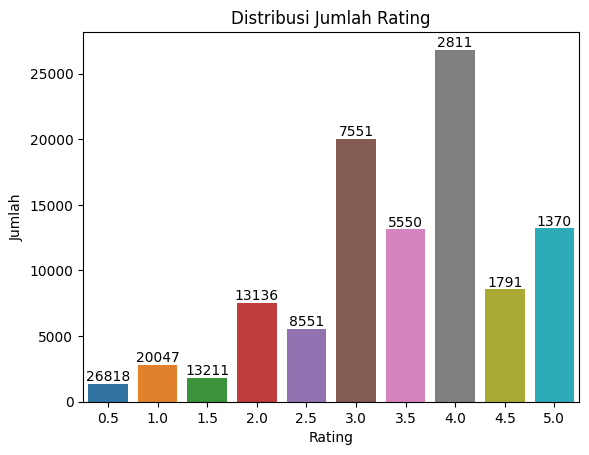

In [ ]:
# Membuat bar plot untuk kolom "rating"
ax = sns.countplot(x=data_rating['rating'])

# Menghitung jumlah rating dalam setiap kategori
rating_counts = data_rating['rating'].value_counts().values

# Menambahkan label nilai tepatnya pada batang bar plot
ax.bar_label(ax.containers[0], labels=rating_counts, label_type='edge')

plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.title('Distribusi Jumlah Rating')
plt.show()

### Pivoted Matriks A (Mean Centered)

In [3]:
#membuat dataframe 'pivoted' dengan baris userid dan kolom movieid dengan nilai rating yg diberikan oleh user kepada movie
pivoted = data_rating.pivot(index="userId", columns="movieId", values="rating")

#menampilkan data
pivoted

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mean_first_row = pivoted.iloc[0].mean()
print(mean_first_row)

4.366379310344827


In [5]:
avrg=pivoted.mean(axis=1)
centerd_pivoted=pivoted.sub(avrg,axis=0)
centerd_pivoted

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,NaN,-0.366379,NaN,NaN,-0.366379,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.363636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.157399,NaN,NaN,NaN,NaN,NaN,-1.157399,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,0.213904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,-0.634176,-1.134176,-1.134176,NaN,NaN,NaN,NaN,NaN,NaN,0.865824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
centerd_pivoted.fillna(0,inplace=True)
centerd_pivoted

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.366379,0.000000,-0.366379,0.0,0.0,-0.366379,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.363636,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,-1.157399,0.000000,0.000000,0.0,0.0,0.000000,-1.157399,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.213904,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,-0.634176,-1.134176,-1.134176,0.0,0.0,0.000000,0.000000,0.0,0.0,0.865824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

###SVD

In [7]:
#Matriks A
A = centerd_pivoted.to_numpy()
print(f"Matriks A              : \n{A}")

#matriks A Transpose
A_T = A.transpose()
print(f"\nMatriks A Transpose : \n{A_T}")

#Matriks A dikali matriks A Transpose
AAT = A.dot(A_T)
print(f"\nMatriks  A Transpose dikali Matriks A: \n{AAT.round(3)}")

#nilai eigen dan vector eigen
eigenvalues, eigenvectors = np.linalg.eig(AAT)

print(f"\nNilai eigen         : \n{eigenvalues}")
print(f"\nVector eigen         : \n{eigenvectors}\n")

#nilai singular (disimbolkan dengan sigma)  = akar dari niai eigen
ns = np.sqrt(eigenvalues)
print("Nilai Singular :")
print(ns)

Matriks A              : 
[[-0.36637931  0.         -0.36637931 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.63417569 -1.13417569 -1.13417569 ...  0.          0.
   0.        ]
 [-0.27027027  0.          0.         ...  0.          0.
   0.        ]
 [ 1.31144393  0.          0.         ...  0.          0.
   0.        ]]

Matriks A Transpose : 
[[-0.36637931  0.          0.         ... -0.63417569 -0.27027027
   1.31144393]
 [ 0.          0.          0.         ... -1.13417569  0.
   0.        ]
 [-0.36637931  0.          0.         ... -1.13417569  0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]

Matriks  A Transpose dikali Matriks A: 
[[ 1.47858e+0

In [8]:
len(ns)

610

In [10]:
# Matriks A
A = centerd_pivoted.to_numpy()
#menyimpan nilai matrix U ke 'U', matriks sigme ke 'sigma, dan matriks V transpose ke 'V_T'
U,sigma,V_T = svds(A, k = 61)
#mengubah matriks singular value sigma menjadi matriks diagonal

In [11]:
sigma[::-1].sort()

In [12]:
print(sigma)

[76.20046537 43.6224036  41.77917206 39.37050585 37.95619249 36.54895519
 35.33542922 34.22406866 33.7660431  33.15013963 32.22447789 31.42236968
 30.9571188  30.43986069 29.62987038 29.07047455 28.65954571 27.8920717
 27.60317219 27.40748097 27.33310706 26.92848211 26.76191852 26.44647585
 26.06091205 25.72479149 25.45418295 25.27008041 24.76502566 24.58907885
 24.33311696 24.14061677 23.76107898 23.583561   23.27253173 23.14178378
 22.99921429 22.89085622 22.61381506 22.41228297 22.31053201 22.05789361
 21.84575005 21.4001866  21.32743222 21.20891333 20.99892796 20.91516737
 20.66212229 20.52281041 20.46920136 20.40792213 20.3396435  20.15863649
 19.9714093  19.87527615 19.73077022 19.52551679 19.50798845 19.37470882
 19.18357496]


In [13]:
sigma[0]/2

38.100232682510956

In [14]:
sigma_train = np.diag(sigma)
sigma_train

array([[76.20046537,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 43.6224036 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 41.77917206, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 19.50798845,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        19.37470882,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 19.18357496]])

In [15]:
# nilai prediksi
model = np.dot(np.dot(U,sigma_train),V_T)

In [16]:
# menormalisasi nilai pada model menjadi pada ratnge -1 s/d 1
model = model + avrg.values.reshape(-1,1)

In [17]:
data_rating['movieId'].nunique()

9724

In [18]:
movies_col=sorted(data_rating['movieId'].unique())
#membuat nilai prediksi kedalam bentuk dataframe
df_prediksi = pd.DataFrame(model,index=pivoted.index,columns= movies_col)

In [19]:
# Membulatkan nilai prediksi menjadi 1 angka desimal
df_prediksi = df_prediksi.round(1)
df_prediksi

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.1,4.2,4.5,4.4,4.3,4.0,4.2,4.4,4.4,4.3,...,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4,4.4
2,3.9,3.9,3.9,4.0,4.0,3.9,3.9,3.9,4.0,4.0,...,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9,3.9
3,2.6,2.4,2.4,2.5,2.4,2.2,2.5,2.5,2.4,2.5,...,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4
4,3.6,3.4,4.2,3.5,3.4,2.8,3.7,3.8,3.5,4.0,...,3.6,3.5,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6
5,3.7,3.6,3.5,3.6,3.6,3.8,3.7,3.6,3.6,3.6,...,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,1.8,4.0,3.8,3.7,3.8,3.6,2.3,3.6,3.7,3.9,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.6
607,3.8,4.1,4.1,3.8,3.9,3.8,3.6,3.9,3.8,3.6,...,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8,3.8
608,2.8,2.4,2.5,3.1,3.3,2.9,3.1,3.1,3.2,3.5,...,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1,3.1


In [20]:
df_prediksi.columns

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            193565, 193567, 193571, 193573, 193579, 193581, 193583, 193585,
            193587, 193609],
           dtype='int64', length=9724)

In [21]:
# Melihat nilai maksimum dari df_prediksi
nilai_maksimum = df_prediksi.max().max()

# Melihat nilai minimum dari df_prediksi
nilai_minimum = df_prediksi.min().min()

print("Nilai Maksimum:", nilai_maksimum)
print("Nilai Minimum:", nilai_minimum)


Nilai Maksimum: 8.4
Nilai Minimum: -5.9


In [22]:
# Menghitung jumlah nilai di atas 5.0
nilai_di_atas_5 = df_prediksi[df_prediksi > 5.0].count().sum()

# Menghitung jumlah nilai di bawah 0
nilai_di_bawah_0 = df_prediksi[df_prediksi < 0].count().sum()

print("Jumlah nilai di atas 5.0:", nilai_di_atas_5)
print("Jumlah nilai di bawah 0:", nilai_di_bawah_0)

Jumlah nilai di atas 5.0: 1042
Jumlah nilai di bawah 0: 52


In [23]:
jml_rating = 610 * 9742
print((nilai_di_atas_5 + nilai_di_bawah_0) / jml_rating * 100)

0.018409388451558404


### Visualisasi JUmlah Nilai singular

In [ ]:
u, s, vt = np.linalg.svd(A)

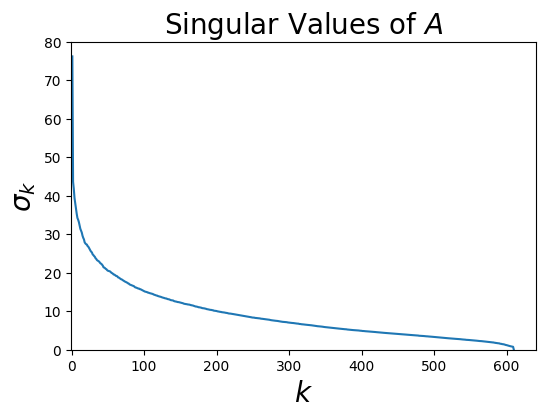

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(s)),s)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
plt.ylim(ymin = 0)
plt.xlim(xmin = -1)
plt.title(r'Singular Values of $A$',size=20);

### Split Evaluasi Model

####lampiran

In [ ]:
# menentukan jumlah untuk data test
print(f"30 % split is ({np.round(pivoted.shape[0]*0.3)},{np.round(pivoted.shape[1]*0.3)})")

30 % split is (183.0,2917.0)


In [ ]:
# data training diambil dari baris 0-121 dan kolom 0-1944
lampiran_nilai_aktual = pivoted.iloc[:183, :2917]
lampiran_nilai_prediksi = df_prediksi.iloc[:183, :2917]

# Membuat boolean mask untuk nilai aktual
bool_nilai_aktual = ~np.isnan(lampiran_nilai_aktual)

In [ ]:
lampiran_nilai_aktual

movieId,1,2,3,4,5,6,7,8,9,10,...,3901,3906,3908,3909,3910,3911,3912,3914,3915,3916
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,4.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181,NaN,NaN,NaN,NaN,3.0,3.0,3.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Memfilter nilai-nilai prediksi berdasarkan boolean mask
lampiran_nilai_aktual[bool_nilai_aktual].to_excel('lampiran_aktual.xlsx', index=True)

In [ ]:
# Memfilter nilai-nilai prediksi berdasarkan boolean mask
lampiran_nilai_prediksi_terfilter = lampiran_nilai_prediksi[bool_nilai_aktual]
lampiran_nilai_prediksi_terfilter.to_excel('lampiran_prediksi.xlsx', index=True)

#### 30%

In [ ]:
# data training diambil dari baris 0-121 dan kolom 0-1944
nilai_aktual = pivoted.iloc[:183, :2917].values
nilai_prediksi = df_prediksi.iloc[:183, :2917].values

In [ ]:
nilai_aktual

array([[ 4., nan,  4., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [ 4., nan, nan, ..., nan,  4.,  3.],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
nilai_prediksi

array([[4.3, 4.4, 4.4, ..., 4.4, 4.4, 4.4],
       [3.9, 4. , 3.9, ..., 3.9, 3.9, 3.9],
       [2.4, 2.5, 2.4, ..., 2.4, 2.4, 2.4],
       ...,
       [3.2, 3. , 2.9, ..., 2.9, 3. , 2.9],
       [3.7, 3.4, 3.3, ..., 3.5, 4. , 3. ],
       [3.9, 3.8, 3.9, ..., 3.8, 3.8, 3.8]])

In [ ]:
# mask berisi nilai actual _values dalam boolean true or false (true jika ada rating)
bool_nilai_aktual = ~np.isnan(nilai_aktual)
bool_nilai_aktual

array([[ True, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False, False]])

In [ ]:
# nilai prediksi sesuai dengan mask
nilai_prediksi[bool_nilai_aktual]

array([4.3, 4.4, 4.3, ..., 3.8, 3.9, 3.8])

In [ ]:
# nilai prediksi sesuai dengan mask
nilai_aktual[bool_nilai_aktual]

array([4., 4., 4., ..., 3., 4., 2.])

In [ ]:
len(nilai_aktual[bool_nilai_aktual])

16384

In [ ]:
#melihat nilai MSE dan MAE
print("Root Mean squared errror",mean_squared_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual],squared=False))
print("Mean squared errror",mean_squared_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual],squared=True))
print("Mean absloute error",mean_absolute_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual]))

Root Mean squared errror 0.7920210623974908
Mean squared errror 0.6272973632812501
Mean absloute error 0.60084228515625


In [ ]:
len(nilai_prediksi[bool_nilai_aktual])

16384

In [ ]:
sum = 0
n = len(nilai_aktual[bool_nilai_aktual])
for i in range(n):
  sum += abs(nilai_prediksi[bool_nilai_aktual][i] - nilai_aktual[bool_nilai_aktual][i])

mae = sum/n
print(sum.round(2))
print(mae)

9844.2
0.6008422851562741


In [ ]:
print(sum/len(nilai_prediksi[bool_nilai_aktual]))

0.6008422851562741


In [ ]:
a = [0, 1, 2, 3, 4, 16379, 16380, 16381, 16382, 16383]
for i in a:
  print(f"nilai aktual dari baris ke {i+1} = {nilai_aktual[bool_nilai_aktual][i]}")

nilai aktual dari baris ke 1 = 4.0
nilai aktual dari baris ke 2 = 4.0
nilai aktual dari baris ke 3 = 4.0
nilai aktual dari baris ke 4 = 5.0
nilai aktual dari baris ke 5 = 5.0
nilai aktual dari baris ke 16380 = 4.0
nilai aktual dari baris ke 16381 = 3.0
nilai aktual dari baris ke 16382 = 3.0
nilai aktual dari baris ke 16383 = 4.0
nilai aktual dari baris ke 16384 = 2.0


In [ ]:
for i in a:
  print(f"nilai prediksi dari baris ke {i+1} = {nilai_prediksi[bool_nilai_aktual][i]}")

nilai prediksi dari baris ke 1 = 4.3
nilai prediksi dari baris ke 2 = 4.4
nilai prediksi dari baris ke 3 = 4.3
nilai prediksi dari baris ke 4 = 4.5
nilai prediksi dari baris ke 5 = 4.5
nilai prediksi dari baris ke 16380 = 3.8
nilai prediksi dari baris ke 16381 = 3.8
nilai prediksi dari baris ke 16382 = 3.8
nilai prediksi dari baris ke 16383 = 3.9
nilai prediksi dari baris ke 16384 = 3.8


In [ ]:
for i in a:
  print(f"nilai prediksi-aktual dari baris ke {i+1} = {abs(nilai_prediksi[bool_nilai_aktual][i] - nilai_aktual[bool_nilai_aktual][i]).round(2) }")

nilai prediksi-aktual dari baris ke 1 = 0.3
nilai prediksi-aktual dari baris ke 2 = 0.4
nilai prediksi-aktual dari baris ke 3 = 0.3
nilai prediksi-aktual dari baris ke 4 = 0.5
nilai prediksi-aktual dari baris ke 5 = 0.5
nilai prediksi-aktual dari baris ke 16380 = 0.2
nilai prediksi-aktual dari baris ke 16381 = 0.8
nilai prediksi-aktual dari baris ke 16382 = 0.8
nilai prediksi-aktual dari baris ke 16383 = 0.1
nilai prediksi-aktual dari baris ke 16384 = 1.8


In [ ]:
nilai_aktual[bool_nilai_aktual][0]

4.0

#### 20%

In [ ]:
# menentukan jumlah untuk data test
print(f"20 % split is ({np.round(pivoted.shape[0]*0.2)},{np.round(pivoted.shape[1]*0.2)})")

20 % split is (122.0,1945.0)


In [ ]:
# data training diambil dari baris 0-121 dan kolom 0-1944
nilai_aktual = pivoted.iloc[:123, :1945].values
nilai_prediksi = df_prediksi.iloc[:123, :1945].values

In [ ]:
# mask berisi nilai actual _values dalam boolean true or false (true jika ada rating)
bool_nilai_aktual = ~np.isnan(nilai_aktual)
bool_nilai_aktual

array([[ True, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
#melihat nilai MSE dan MAE
print("Root Mean squared errror",mean_squared_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual],squared=False))
print("Mean squared errror",mean_squared_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual],squared=True))
print("Mean absloute error",mean_absolute_error(nilai_aktual[bool_nilai_aktual],nilai_prediksi[bool_nilai_aktual]))

Root Mean squared errror 0.820423879604994
Mean squared errror 0.6730953422261097
Mean absloute error 0.634233544719003


### Mencoba memberi rekomendasi kepada user

In [ ]:
input_id_pengguna = input("Masukkan userid : ")
if input_id_pengguna.isnumeric() == True:
  input_id_pengguna = int(input_id_pengguna)

Masukkan userid : 1


In [ ]:
def movie_rekomendasi_to_user (df_prediksi, user_id):
  rated_movie_ids = data_merge[data_merge['userId'] == input_id_pengguna]['movieId'].tolist()

  # Membuat DataFrame baru untuk menyimpan data film yang pernah dirating oleh pengguna
  movie_list = data_movie[data_movie['movieId'].isin(rated_movie_ids)].copy()

      # Merge dengan data rating untuk mendapatkan rating setiap film yang pernah dirating oleh pengguna
  movie_list = movie_list.merge(data_merge[data_merge['userId'] == input_id_pengguna], on='movieId', how='left')

  # Mengurutkan berdasarkan rating secara menurun
  movie_list = movie_list.sort_values('rating', ascending=False)

  movie_list_fav = movie_list[movie_list['rating'] >= 3.5]
  movie_list_unfav = movie_list[movie_list['rating'] <= 2]

  user_genres_fav = movie_list_fav.loc[movie_list['userId'] == input_id_pengguna, 'genres'].sum()
  user_unique_genres_fav = np.unique(user_genres_fav)

  user_genres_unfav = movie_list_unfav.loc[movie_list['userId'] == input_id_pengguna, 'genres'].sum()
  user_unique_genres_unfav = np.unique(user_genres_unfav)

  genre_unik = np.unique(data_movie['genres'].sum())
  maybe_fav_genre = list(set(genre_unik) - set(user_unique_genres_unfav))

  # mengambil index dari user_id
  indeks = df_prediksi.index.get_loc(input_id_pengguna)
  # mengambil data hasil prediksi rating untuk user
  user_ratings = df_prediksi.iloc[indeks, :].sort_values(ascending=False)
  # memasukkan 100 film yang sudah diprediksi ratingnya untuk user ke movies_ids
  movies_ids=list(user_ratings.index[0:1000])
  # buat dataframe baru untuk menyimpan data movie dari 100 moviees_id untuk user

  data = pd.DataFrame()
  for i in movies_ids:
    data  = pd.concat([data, data_movie[data_movie['movieId' ]== i]])

  if (user_unique_genres_fav[0]==0):
    filtered_df_1 = data[data['genres'].apply(lambda x: set(x).issubset(set(maybe_fav_genre)))]
  else:
    filtered_df_1 = data[data['genres'].apply(lambda x: set(x).issubset(set(user_genres_fav)))]

  if(len(filtered_df_1) < 25):
        filtered_df_1 = data.sample(frac = 1)

  return filtered_df_1

In [ ]:
def user_movie_rating(data_rating, data_movie, user_id):
    # Mengambil daftar semua movieId yang pernah dirating oleh pengguna
    rated_movie_ids = data_rating[data_rating['userId'] == user_id]['movieId'].tolist()
    # Membuat DataFrame baru untuk menyimpan data film yang pernah dirating oleh pengguna
    movie_list = data_movie[data_movie['movieId'].isin(rated_movie_ids)].copy()
    # Merge dengan data rating untuk mendapatkan rating setiap film yang pernah dirating oleh pengguna
    movie_list = movie_list.merge(data_rating[data_rating['userId'] == user_id], on='movieId', how='left')
    # Mengurutkan berdasarkan rating secara menurun

    return movie_list

In [ ]:
print(f"Top 10 Movie yang di rekomendasikan untuk user {input_id_pengguna} : ")
movie_rekomendasi_to_user(df_prediksi, input_id_pengguna).head(15)

Top 10 Movie yang di rekomendasikan untuk user 1 : 


,movieId,title,genres
197,231,Dumb & Dumber (Dumb and Dumber) (1994),"[Adventure, Comedy]"
302,344,Ace Ventura: Pet Detective (1994),[Comedy]
923,1222,Full Metal Jacket (1987),"[Drama, War]"
863,1136,Monty Python and the Holy Grail (1975),"[Adventure, Comedy, Fantasy]"
4137,5952,"Lord of the Rings: The Two Towers, The (2002)","[Adventure, Fantasy]"
815,1073,Willy Wonka & the Chocolate Factory (1971),"[Children, Comedy, Fantasy, Musical]"
909,1208,Apocalypse Now (1979),"[Action, Drama, War]"
176,208,Waterworld (1995),"[Action, Adventure, Sci-Fi]"
4800,7153,"Lord of the Rings: The Return of the King, The...","[Action, Adventure, Drama, Fantasy]"
969,1270,Back to the Future (1985),"[Adventure, Comedy, Sci-Fi]"


In [ ]:
print(f"Top 10 Movie yang di rating user {input_id_pengguna} : ")
user_movie_rating(data_merge, data_movie, input_id_pengguna)

Top 10 Movie yang di rating user 1 : 


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703.0
1,3,Grumpier Old Men (1995),"[Comedy, Romance]",1,4.0,964981247.0
2,6,Heat (1995),"[Action, Crime, Thriller]",1,4.0,964982224.0
3,47,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1,5.0,964983815.0
4,50,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1,5.0,964982931.0
...,...,...,...,...,...,...
227,3744,Shaft (2000),"[Action, Crime, Thriller]",1,4.0,964980694.0
228,3793,X-Men (2000),"[Action, Adventure, Sci-Fi]",1,5.0,964981855.0
229,3809,What About Bob? (1991),[Comedy],1,4.0,964981220.0
230,4006,Transformers: The Movie (1986),"[Adventure, Animation, Children, Sci-Fi]",1,4.0,964982903.0


### Ignore

In [ ]:
df_prediksi.shape

In [ ]:
df_prediksi.iloc[614,:]

In [ ]:
genre_unik

In [ ]:

rated_movie_ids = data_merge[data_merge['userId'] == input_id_pengguna]['movieId'].tolist()

# Membuat DataFrame baru untuk menyimpan data film yang pernah dirating oleh pengguna
movie_list = data_movie[data_movie['movieId'].isin(rated_movie_ids)].copy()

    # Merge dengan data rating untuk mendapatkan rating setiap film yang pernah dirating oleh pengguna
movie_list = movie_list.merge(data_merge[data_merge['userId'] == input_id_pengguna], on='movieId', how='left')

    # Mengurutkan berdasarkan rating secara menurun
movie_list = movie_list.sort_values('rating', ascending=False)

movie_list_fav = movie_list[movie_list['rating'] >= 3.5]
movie_list_unfav = movie_list[movie_list['rating'] <= 2]

user_genres_fav = movie_list_fav.loc[movie_list['userId'] == input_id_pengguna, 'genres'].sum()
user_unique_genres_fav = np.unique(user_genres_fav)

user_genres_unfav = movie_list_unfav.loc[movie_list['userId'] == input_id_pengguna, 'genres'].sum()
user_unique_genres_unfav = np.unique(user_genres_unfav)

maybe_fav_genre = list(set(genre_unik) - set(user_unique_genres_unfav))


In [ ]:
user_unique_genres_fav

In [ ]:
user_unique_genres_unfav

In [ ]:
maybe_fav_genre = list(set(genre_unik) - set(user_unique_genres_unfav))
maybe_fav_genre

In [ ]:
# mengambil index dari user_id
indeks = df_prediksi.index.get_loc(input_id_pengguna)
# mengambil data hasil prediksi rating untuk user
user_ratings = df_prediksi.iloc[indeks, :].sort_values(ascending=False)
# memasukkan 100 film yang sudah diprediksi ratingnya untuk user ke movies_ids
movies_ids=list(user_ratings.index[0:1000])
# buat dataframe baru untuk menyimpan data movie dari 100 moviees_id untuk user

data = pd.DataFrame()
for i in movies_ids:
  data  = pd.concat([data, data_movie[data_movie['movieId' ]== i]])

In [ ]:
if (user_unique_genres_fav[0]==0):
  filtered_df_1 = data[data['genres'].apply(lambda x: set(x).issubset(set(maybe_fav_genre)))]
else:
  filtered_df_1 = data[data['genres'].apply(lambda x: set(x).issubset(set(user_genres_fav)))]

In [ ]:
filtered_df_1.head()

In [ ]:
len(filtered_df_1)

In [ ]:
filtered_df_1

In [ ]:
if

In [ ]:
filtered_df_1 = data[data['genres'].apply(lambda x: set(x).issubset(set(maybe_fav_genre)))]
filtered_df_1.head(10)

In [ ]:
not_in_user_genre = list(set(unik_genre) - set(user_unique_genres))

print(not_in_user_genre)

In [ ]:
movie_list = pd.DataFrame(user_movie_rating(data_merge, data_movie, input_id_pengguna))
user_genres = movie_list.loc[movie_list['userId'] == input_id_pengguna, 'genres'].sum()
user_unique_genres = np.unique(user_genres)
user_unique_genres
  genre_unik = np.unique(data_movie['genres'].sum())
  not_in_user_genre = list(set(unik_genre) - set(user_unique_genres))

## Import to JSON

In [ ]:
import json

def movie_rekomendasi_to_user(df_prediksi, user_id, data_movie):
    user_ratings = df_prediksi.iloc[user_id, :].sort_values(ascending=False)
    # Memasukkan 100 film yang sudah diprediksi ratingnya untuk user ke movies_ids
    movies_ids = list(user_ratings.index[0:100])
    # Buat DataFrame baru untuk menyimpan data movie dari 100 moviees_id untuk user
    data = data_movie[data_movie['movieId'].isin(movies_ids)]
    # Mengonversi DataFrame menjadi bentuk JSON
    json_data = data.to_json(orient='records')
    return json_data


In [ ]:
import json
import io

def download_json_file(json_data, file_name):
    # Mengonversi data JSON menjadi string
    json_str = json.dumps(json_data)

    # Membuka file menggunakan modul io
    with io.open(file_name, 'w', encoding='utf-8') as file:
        # Menulis string JSON ke dalam file
        file.write(json_str)

    print(f"File JSON '{file_name}' berhasil didownload.")

In [ ]:

download_json_file(movie_rekomendasi_to_user(df_prediksi, input_id_pengguna, data_movie), "Prediksi_json")